In [1]:
using Random
using LinearAlgebra
using Revise
using RPCholesky
using Plots
using Distributions
using BenchmarkTools

[ Info: Precompiling RPCholesky [72641a9e-0ae7-4379-851f-e6d22edf0786]


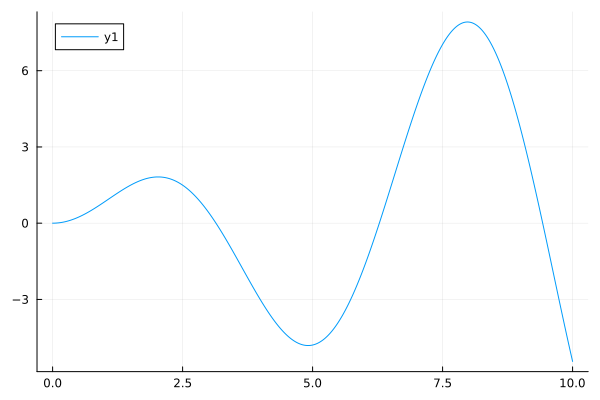

In [3]:
xx = LinRange(0,10,1000);
f(x) = x * sin(x);
yy = f.(xx);
plot(xx,yy)

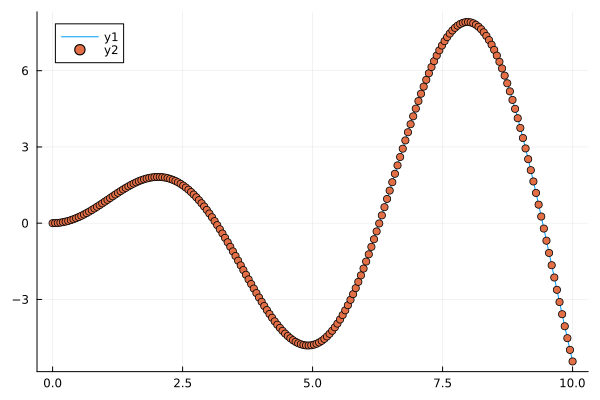

In [59]:
Random.seed!(100)

N = 200;

# x_pts = rand(Uniform(0,10),N)
x_pts = LinRange(0,10,N);
y_pts = f.(x_pts) ;
plot(xx,yy)
scatter!(x_pts, y_pts)

In [60]:
h = 1.;
K(x,y) = exp(-(x-y)^2 / (2*h^2))
A = [K(x_,y_) for x_ in x_pts, y_ in x_pts];
λ = 1e-8;
# @btime β = (A'*A + λ*N*A)\(A'*y_pts);

In [61]:
β = (A'*A + λ*N*A)\(A'*y_pts);
f_apx(x) = β ⋅ K.(x_pts,x);

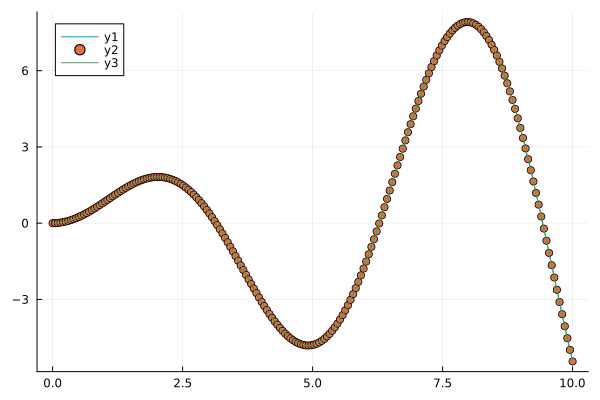

In [62]:
plot(xx,yy)
scatter!(x_pts, y_pts)
plot!(xx, f_apx.(xx))

In [71]:
k = 20;
# @btime β_rpc, S_rpc = ridge_rpcholesky(A, y_pts,k , λ, τ=1e-12);
# @show size(A);

In [72]:
β_rpc, S_rpc = ridge_rpcholesky(A, y_pts,k , λ, τ=1e-12);
f_rpc(x) = β_rpc ⋅ K.(x_pts[S_rpc],x);


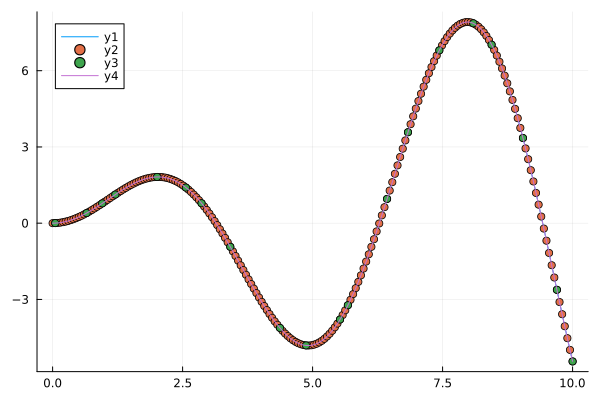

In [73]:
plot(xx,yy)
scatter!(x_pts, y_pts)
scatter!(x_pts[S_rpc], y_pts[S_rpc])
plot!(xx, f_rpc.(xx))


In [74]:
norm(f_rpc.(x_pts) - y_pts, Inf)

0.00413124952904198